In [1]:
# loading the required libraries 
#Load required libraries
import os
import csv
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
import string
punctuations = string.punctuation
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# set the working directory
os.chdir('C:/Users/admin/Documents/Python Files')
os.getcwd()

'C:\\Users\\admin\\Documents\\Python Files'

In [216]:
## Connect Twitter

#Store required keys
consumer_key = "9geIDwOzVdbm0dCuAiUpzCUnu"
consumer_secret = "TzkfViMc6bDdK2FILQ8xTVCG82qjn0FhUdvsJGzlQ79J0EG3SR"
access_key = "1541025487-DeXUlBh0Oo76u5NWW4j7iPejrTlRbw3A3Q2zMU0"
access_secret = "J0H68P6Zgmx7tcQfEL0qjDVgsTXsPTGeRml04cbk233jp"

In [217]:
#Establish connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

##### 	We have extracted tweets by below trending Hastags
1. 	#BTSWORLD
2. 	#PAKvNZ
3. 	#GOT7onTodayShow
4.  #StepDownCM
5. 	#AjazKhan
6.  #JSWPlatinaLaunch
7. 	#ZeroTrustGovt
8. 	#TheLionKingWithKingKhan
9.  #PrayForKyoani
10. #SecretOfHappyLife
11.	#FridayFeeling
12. #TopGunMaverick
13. #MangalPandey
14. #ICCHallOfFame
15. Cats
16. #SaturdayMotivation
17. #TheeMugamDhaan
18. #PriyankaTakesCharge
19. #Justus2
20. #WorldsToughestPanga
21. #SonbhadraMassacre
22. #3rdSingle
23. #LuvRanjan
24. #notmydeepika
25. #AnandibenPatel

#### Let's extract the tweets based on above hastags
- we have used 2 hastags at a time to retrive data
- Note: we have already extracted the data and uploaded on github repository so you can use that

In [218]:
#Extract tweets
#Create empty list
results = []
trending_hastags = ['#notmydeepika','#AnandibenPatel']
for i in trending_hastags:
    #Get the first 500 items based on the search query
    for tweet in tweepy.Cursor(api.search,q=i,lang="en").items(600):
        results.append(tweet)

In [219]:
# Verify the number of items returned
print(len(results))

80


In [220]:
#Convert list into dataframe
def toDataFrame(tweets):
    #Create empty data frame
    DataSet = pd.DataFrame()
    
    #extract relevant information
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]

    return DataSet

In [221]:
#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [222]:
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,1152822068372578304,RT @EntDC: Here's why @deepikapadukone's fans ...,8,0,Twitter for Android,2019-07-21 06:06:14,2394083281,NandineeSamban,Nandinee,2014-03-17 09:18:03,I'm here for Deepika and Ranveer 💕 #DeepVeer ❤,922,111,Republic of Mauritius,None
1,1152821966144860160,@masalamagazine Never in a million years. #Not...,0,0,Twitter Web App,2019-07-21 06:05:49,1136946703116804096,MonaDarlingx,𝐫𝐢𝐚 ❦,2019-06-07 10:43:12,𝙖𝙡𝙬𝙖𝙮𝙨 𝙘𝙝𝙤𝙤𝙨𝙚 𝙡𝙤𝙫𝙚. ♡ || 1D • ZM • TS • Bolly ...,615,409,wherever the wind takes me.,None
2,1152821733981851653,@masalamagazine It’s a protest so the answer i...,0,0,Twitter for iPhone,2019-07-21 06:04:54,4898135933,Sh_RD1,Shoug 🇸🇦🦋,2016-02-11 14:25:00,I am both worse and better than you thought. ✨,210,60,"Manchester, England / Riyadh.",None
3,1152821479022768128,@masalamagazine No never 👎 #notmydeepika,0,1,Twitter for iPhone,2019-07-21 06:03:53,3423196185,deepveerian,neha,2015-08-15 01:32:54,“deepveer fans are super dangerous and super v...,583,101,,None
4,1152821315235143686,Deepika Padukone Fans Trend #NotMyDeepika; Urg...,1,0,IFTTT,2019-07-21 06:03:14,2974304162,TBReporter,Bollywood Reporter,2015-01-11 07:30:04,The Bollywood Reporter is the premier destinat...,4967,1,"Mumbai, Maharashtra, India",None


In [223]:
DataSet.to_csv('tweeterDataset11.csv')

#### Let's load all the tweeter dataset we extracted

In [3]:
#Load twitter data
a = pd.read_csv("tweeterDataset.csv")
b = pd.read_csv("tweeterDataset1.csv")
c = pd.read_csv("tweeterDataset2.csv")
d = pd.read_csv("tweeterDataset3.csv")
e = pd.read_csv("tweeterDataset4.csv")
f = pd.read_csv("tweeterDataset5.csv")
g = pd.read_csv("tweeterDataset6.csv")
h = pd.read_csv("tweeterDataset7.csv")
i = pd.read_csv("tweeterDataset8.csv")
j = pd.read_csv("tweeterDataset9.csv")
k = pd.read_csv("tweeterDataset10.csv")
l = pd.read_csv("tweeterDataset11.csv")
m = pd.read_csv("tweeterDataset12.csv")
n = pd.read_csv("tweeterDataset13.csv")
o = pd.read_csv("tweeterDataset14.csv")
p = pd.read_csv("tweeterDataset15.csv")
# q = pd.read_csv("tweeterDataset16.csv")
r = pd.read_csv("tweeterDataset17.csv")

In [4]:
dataset = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,r],ignore_index=True)

In [5]:
dataset.head(5)

,Unnamed: 0,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,0,1143919690743341056,RT @softwhoseok: me explaining to namjoon and ...,169,0,Twitter for Android,2019-06-26 16:31:21,192224155,owenthesaintss,✨ hope right here✨,2010-09-18 14:48:44,FUCK your zodiac sign what’s your name what ex...,547,421,NaN,NaN
1,1,1143919690718334976,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,Twitter for Android,2019-06-26 16:31:21,1141749496755499011,reveluv_exe,Gabi$ 🤡 #ATEEZ2ndWin ಥ‿ಥ,2019-06-20 16:47:47,to__##JIMINIE : I will be your manager on bts ...,20,55,was created 20/06/19,NaN
2,2,1143919690407956483,RT @guroderes: i drew my personal interpretati...,3785,0,Twitter for iPhone,2019-06-26 16:31:21,3234322494,whozhaechann,ThaYsPetAcuLaR Viu o jk voando 25/05,2015-06-02 23:45:29,If teardrops could be bottled? 🥀{fã account} @...,7169,7142,"Rio de Janeiro, Brasil",NaN
3,3,1143919689786990594,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,Twitter Web App,2019-06-26 16:31:21,1127776211214655489,chilachiara,Chila,2019-05-13 03:22:56,I dont care,4,17,NaN,NaN
4,4,1143919689619398656,RT @sugasaward: Me chasing seokjin to audition...,1217,0,Twitter Web App,2019-06-26 16:31:21,1113918609275990016,LeilaXBangtan,Leila🔥,2019-04-04 21:37:46,NaN,716,4442,NaN,NaN


In [6]:
dataset.shape

(16515, 16)

In [7]:
df = dataset.copy()

In [8]:
df.columns

Index(['Unnamed: 0', 'tweetID', 'tweetText', 'tweetRetweetCt',
       'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'userID',
       'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userFollowerCt',
       'userFriendsCt', 'userLocation', 'userTimezone'],
      dtype='object')

In [9]:
# let's remove the features which are not required 
df = df.drop(['Unnamed: 0', 'tweetID', 'tweetSource', 'tweetCreated', 'userID',
       'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userLocation', 'userTimezone','userFollowerCt',
       'userFriendsCt'],axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16515 entries, 0 to 16514
Data columns (total 3 columns):
tweetText          16515 non-null object
tweetRetweetCt     16515 non-null int64
tweetFavoriteCt    16515 non-null int64
dtypes: int64(2), object(1)
memory usage: 387.1+ KB


In [11]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt
count,16515.000000,16515.000000
mean,604.604905,0.718801
std,2510.606531,9.707020
min,0.000000,0.000000
25%,0.000000,0.000000
50%,15.000000,0.000000
75%,198.000000,0.000000
max,118799.000000,805.000000


###### let' feature engineer features like : 
- Length of tweet (1 to 140 characters) 
- Average word length in tweet 
- Number of #hashtags 
- Number of @mentions 
- Number of links  

In [12]:
def length_of_tweet(tweet):
    return len(tweet)

In [13]:
def avg_len(length):
    return length/sum(df['length_of_tweet'])

In [14]:
def num_hastags(tweet):
    count = 0
    words = tweet.split()
    for word in words:
        if word[:1] == '#' and len(word)>1:
            count+=1
    return count

In [15]:
def num_mentions(tweet):
    words = tweet.split()
    count = 0
    for word in words:
        if word[:1] == '@' and len(word)>1:
            count+=1
    return count

In [16]:
def num_links(tweet):
    words = tweet.split()
    count = 0
    for word in words:
        if word[:5] == 'https' and len(word)>5:
            count+=1
    return count

In [17]:
df['num_links'] = df['tweetText'].apply(num_links)
df['num_mentions'] = df['tweetText'].apply(num_mentions)
df['num_hastags'] = df['tweetText'].apply(num_hastags)
df['length_of_tweet'] = df['tweetText'].apply(length_of_tweet)

In [18]:
df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet
0,RT @softwhoseok: me explaining to namjoon and ...,169,0,1,1,1,140
1,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,0,1,1,140
2,RT @guroderes: i drew my personal interpretati...,3785,0,1,1,2,121
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,0,1,2,140
4,RT @sugasaward: Me chasing seokjin to audition...,1217,0,1,1,1,93


In [19]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet
count,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000
mean,604.604905,0.718801,0.449167,1.203754,1.258129,124.865335
std,2510.606531,9.707020,0.522248,1.122706,1.305854,25.293619
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,114.000000
50%,15.000000,0.000000,0.000000,1.000000,1.000000,140.000000
75%,198.000000,0.000000,1.000000,1.000000,2.000000,140.000000
max,118799.000000,805.000000,3.000000,12.000000,13.000000,154.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16515 entries, 0 to 16514
Data columns (total 7 columns):
tweetText          16515 non-null object
tweetRetweetCt     16515 non-null int64
tweetFavoriteCt    16515 non-null int64
num_links          16515 non-null int64
num_mentions       16515 non-null int64
num_hastags        16515 non-null int64
length_of_tweet    16515 non-null int64
dtypes: int64(6), object(1)
memory usage: 903.2+ KB


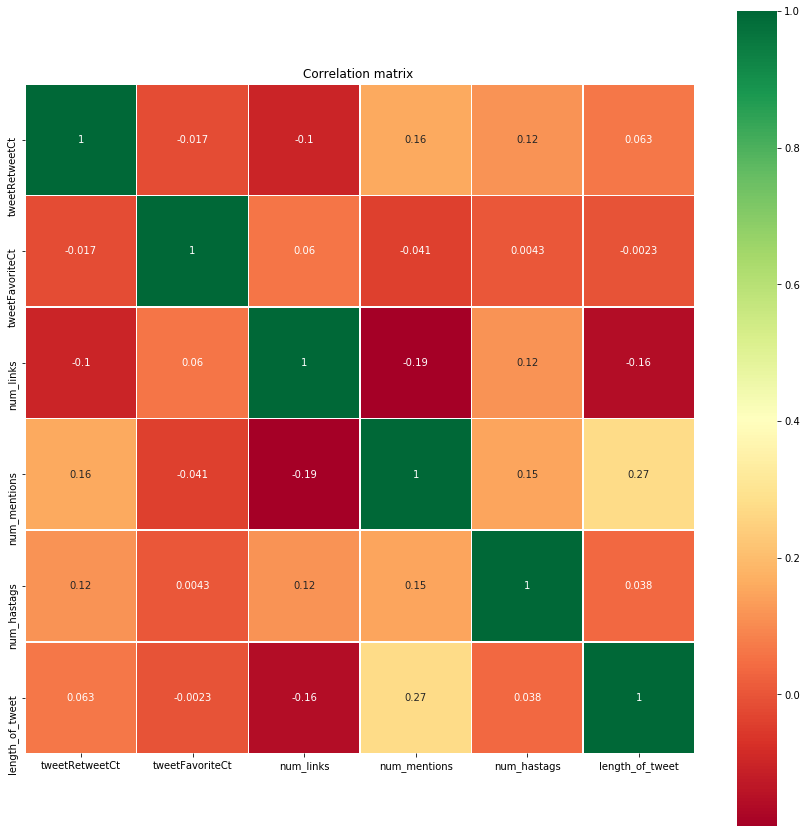

In [21]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['tweetRetweetCt','tweetFavoriteCt','num_links','num_mentions','num_hastags','length_of_tweet']].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

#### Using  below attribute/features to create score column:
1. 'tweetRetweetCt'
2. 'tweetFavoriteCt'
3. 'num_links'
4. 'num_mentions' 
5. 'num_hastags'
6. 'length_of_tweet'

In [22]:
df['score_6'] = df['tweetRetweetCt']+df['tweetFavoriteCt']+df['num_links']+df['num_mentions']+df['num_hastags']+df['length_of_tweet']
df['score_2'] = df['tweetRetweetCt']+df['tweetFavoriteCt']

In [23]:
# Normalizing score_6 values in range 0 to 100
df['score_6'] = (df['score_6'] - min(df['score_6']))/(max(df['score_6']) - min(df['score_6']))*100

In [24]:
# Normalizing score_2 values in range 0 to 100
df['score_2'] = (df['score_2'] - min(df['score_2']))/(max(df['score_2']) - min(df['score_2']))*100

In [25]:
df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet,score_6,score_2
0,RT @softwhoseok: me explaining to namjoon and ...,169,0,1,1,1,140,0.258948,0.142257
1,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,0,1,1,140,0.443069,0.327444
2,RT @guroderes: i drew my personal interpretati...,3785,0,1,1,2,121,3.283926,3.186054
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,0,1,2,140,0.337977,0.221382
4,RT @sugasaward: Me chasing seokjin to audition...,1217,0,1,1,1,93,1.100527,1.024419


In [26]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet,score_6,score_2
count,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000
mean,604.604905,0.718801,0.449167,1.203754,1.258129,124.865335,0.612983,0.509536
std,2510.606531,9.707020,0.522248,1.122706,1.305854,25.293619,2.112333,2.113198
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,114.000000,0.113500,0.000842
50%,15.000000,0.000000,0.000000,1.000000,1.000000,140.000000,0.126111,0.012626
75%,198.000000,0.000000,1.000000,1.000000,2.000000,140.000000,0.277444,0.168352
max,118799.000000,805.000000,3.000000,12.000000,13.000000,154.000000,100.000000,100.000000


#### Let's check how many tweets have scores above 10

In [27]:
df[df['score_6']>10]

,tweetText,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet,score_6,score_2
18,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21923,0,0,1,1,146,18.552584,18.453859
29,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21926,0,0,1,1,146,18.555106,18.456384
124,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21932,0,0,1,1,146,18.560151,18.461435
151,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21932,0,0,1,1,146,18.560151,18.461435
154,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21932,0,0,1,1,146,18.560151,18.461435
158,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21932,0,0,1,1,146,18.560151,18.461435
186,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21934,0,0,1,1,146,18.561832,18.463118
229,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21940,0,0,1,1,146,18.566877,18.468169
240,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21940,0,0,1,1,146,18.566877,18.468169
301,RT @BTSW_official: &lt;BTS WORLD&gt; Grand Lau...,21951,0,0,1,1,146,18.576125,18.477428


In [28]:
# let's save the row numbers of tweets whichh are above 10 score
row_num = df[df['score_6']>10].index

In [29]:
dataset.iloc[5335,1]

1152057572112781312

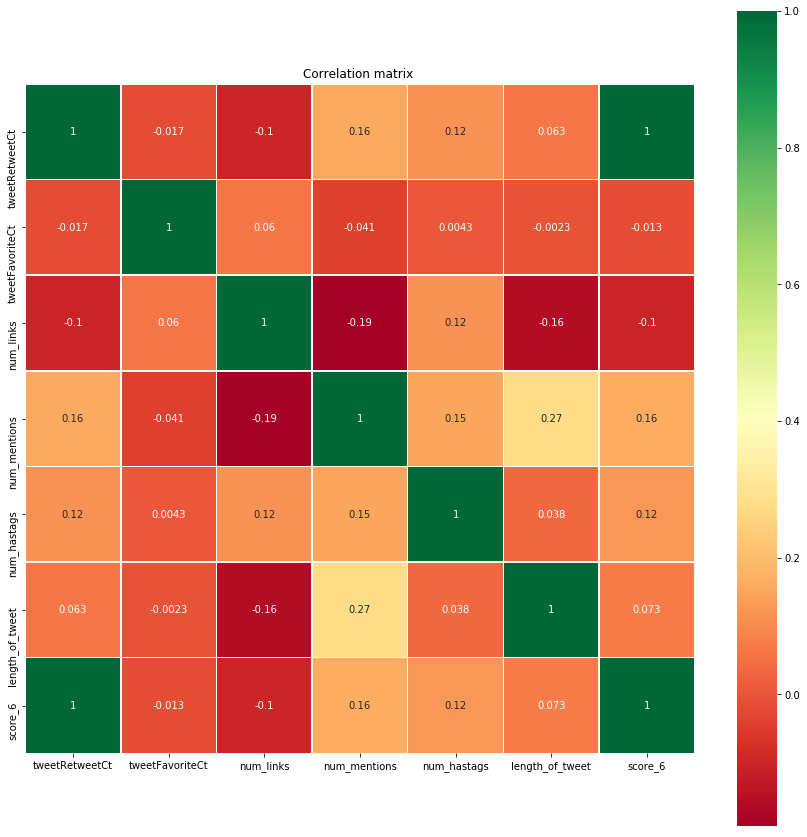

In [30]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['tweetRetweetCt','tweetFavoriteCt','num_links','num_mentions','num_hastags','length_of_tweet','score_6']].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

#### From above correlation Plot we can see that 'tweetRetweetCt' and 'score' are highly correlated with each other

#### Let's drop all the features which were used to create 'score' column

In [31]:
df2 = df.copy()

In [32]:
df2.drop(df2.columns.difference(['tweetText','score_6']), 1, inplace=True)

In [33]:
df2.head()

,tweetText,score_6
0,RT @softwhoseok: me explaining to namjoon and ...,0.258948
1,RT @agustshoongi: Me before #BTSWORLD: any one...,0.443069
2,RT @guroderes: i drew my personal interpretati...,3.283926
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,0.337977
4,RT @sugasaward: Me chasing seokjin to audition...,1.100527


In [34]:
# create the nlp object using Spacy's English language class
nlp = English()

In [35]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized and lowercased    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words using stopword from spacy library and punctuations from string library
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [36]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [37]:
# bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
# Creating the Bag of Words model
bow_vector = CountVectorizer(max_features = 100,tokenizer = spacy_tokenizer,ngram_range=(4,5))

# Separating labels and features

random state values = 42,13,10,99

In [38]:
X = df2.drop('score_6',axis=1).values
y = df2['score_6'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.13, random_state=99)
print(df2.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(16515, 2) (14368, 1) (2147, 1) (14368,) (2147,)


In [39]:
original_index = y_test

In [40]:
X_train = X_train.ravel()

In [41]:
X_train.shape

(14368,)

In [42]:
X_test = X_test.ravel()

In [161]:
X_test.shape

(2157,)

In [162]:
y_train.shape

(14429,)

In [163]:
X_train

array(['@dhanushkraja interacting with students at #VikatanStudentScheme\r\n\r\n@vinod_offl @RIAZtheboss https://t.co/hn9jBFU9o9',
       '@loksabhaspeaker @LokSabhaSectt Tribute to Brave hero of the Indian Rebellion of 1857 , #MangalPandey, on his birth… https://t.co/ymbi2FY1o5',
       "RT @Theashwaniarora: Being nice to someone you dislike doesn't mean you're being fake...It means you're mature enough to tolerate that indi…",
       ...,
       "RT @RazaGabharani: @NupurSharmaBJP @tehseenp @TimesNow\r\nHere is a video were #PriyankaGandhi\r\nSaid 3 people, please don't let false news pedd…",
       'RT @AestheticsJapan: The deaths at Kyoto Animation are heartbreaking. Thank you for the lovely animation you have brought to the world. 💙 #…',
       '@bankofbaroda @BankofBarodaCEO #BOBturns112\r\nNotebooks distribution to school children of pallapatti village near Si… https://t.co/8R8W9wnGJR'],
      dtype=object)

In [164]:
# Let's use xgboost regressor as model to train
xgboost = XGBRegressor()

In [165]:
# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('tfidf',TfidfTransformer()),
                 ('regressor', xgboost)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x000002329EA01CF8>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
       ...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [166]:
pred = pipe.predict(X_test)

In [167]:
len(pred)

2157

In [168]:
sum(pd.DataFrame(pred).iloc[:,0]>10)

10

In [169]:
a = pd.DataFrame(pred)

In [170]:
index = a[a.iloc[:,0]>10].index

In [171]:
index

Int64Index([203, 338, 402, 996, 1233, 1656, 1693, 1889, 2003, 2149], dtype='int64')

In [172]:
test = pd.DataFrame(original_index)

In [173]:
search = test.iloc[index,0].index

In [174]:
tweetid = dataset.iloc[search,1].values

In [175]:
tweetid

array([1143919599349641216, 1143919536837713921, 1143919503807397888,
       1143918436361355264, 1143920259453161473, 1151900058800943105,
       1151898814984228865, 1151894057867780096, 1151903499564851201,
       1151899121344638976], dtype=int64)

In [43]:
# list of tweetid that have been retweeted
s = [1143919600578338816, 1143919519716560897, 1151902457863163909, 1143919625572405248, 1143919550578221057, 1143919469007384576, 1143919456546185216, 1143919023588986880, 1151897030018473984, 
    1151896093187301381, 1151893913780625408, 1151902254116376576, 1143919511533260800, 1143919245904007168, 1151900509680197633, 1151893485999419392, 1143919599349641216, 1143919536837713921, 1143919503807397888,
    1143918436361355264, 1143920259453161473, 1151900058800943105, 1151898814984228865, 1151894057867780096]

In [44]:
len(s)

24

#### Retweet the tweets using a new account

In [116]:
## Connect Twitter

consumer_key = "mw2SbMaCkFvOqZ8ZJQdpiXIQg"
consumer_secret = "rC1UdwhVnYdkZmbr1yWeH9zpwbGMtziYSXlGurV9d0WloDARxc"
access_key = "1140264743501832192-LrfsROb3fxzogCWEOsgJfMQPX9fFX5"
access_secret = "U12yKaeKK86739s0rDx4bG7b3dcUXcL56IcQ12SlzXxvT"
#Establish connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [183]:
api.retweet(1151894057867780096)

Status(_api=<tweepy.api.API object at 0x000002329E31D748>, _json={'created_at': 'Sun Jul 21 05:54:43 +0000 2019', 'id': 1152819172696444929, 'id_str': '1152819172696444929', 'text': "RT @CTRavi_BJP: CM @hd_kumaraswamy himself proposed to prove his Government's majority in the Assembly.\n\nBy misusing the Speaker's Chair to…", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'CTRavi_BJP', 'name': 'C T Ravi 🇮🇳 ಸಿ ಟಿ ರವಿ', 'id': 303783976, 'id_str': '303783976', 'indices': [3, 14]}, {'screen_name': 'hd_kumaraswamy', 'name': 'H D Kumaraswamy', 'id': 2601301140, 'id_str': '2601301140', 'indices': [19, 34]}], 'urls': []}, 'source': '<a href="https://gauravsolanki.com" rel="nofollow">Gaurav Project</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1140264743501832192, 'id_str': '1140264743501832192', 'name': 'Gaura

In [45]:
my_tweets = pd.DataFrame()
for i in s:
    t= dataset[dataset['tweetID']==i]
    my_tweets = my_tweets.append(t)

In [46]:
my_tweets

,Unnamed: 0,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
202,202,1143919600578338816,taehyung really snapped with his acting in thi...,0,0,Twitter for iPhone,2019-06-26 16:31:00,2908790190,springtaeV_V,𝗻,2014-11-24 07:27:57,𝟭𝟴^𝗹𝗲𝘀𝗯𝗶𝗮𝗻^𝗯𝗽&𝗯𝘁𝘀 *_* +𝗹𝗼𝗼𝗻𝗮 𝘁𝘄𝗶𝗰𝗲 + 𝗿𝗲𝗱𝘃,2930,2622,az,NaN
369,369,1143919519716560897,LETS BE MANAGER MATES IM 7F3N9AC ADD ME BBS #...,4,14,Twitter for iPhone,2019-06-26 16:30:41,1009455800631382016,incorrect_1997,incorrect jungkook,2018-06-20 15:19:52,Let’s get it • incorrect jungkook account • pr...,33108,60,NaN,NaN
2045,545,1151902457863163909,#AjazKhan Ya Allah! Where is U.N?,0,0,Twitter for Android,2019-07-18 17:12:01,143018148,ndipesh,Dipeeshh,2010-05-12 10:46:58,On a journey to excercise my Independence.Not ...,73,267,Mumbai,NaN
157,157,1143919625572405248,RT @magicshopkook: bro if rapline didn’t like ...,203,0,Twitter for iPhone,2019-06-26 16:31:06,1050461529886347266,a32619,a326 still wants to be at muster,2018-10-11 19:02:00,#ARMYing 💜,41,35,NaN,NaN
307,307,1143919550578221057,RT @guroderes: i drew my personal interpretati...,3804,0,Twitter for iPhone,2019-06-26 16:30:48,1139186555275358215,dearlypjimin,E⚡️,2019-06-13 15:03:34,NaN,10,91,France,NaN
468,468,1143919469007384576,RT @yooongiful: REMEMBER WHEN EVERYONE SAW THE...,779,0,Twitter for Android,2019-06-26 16:30:29,4395788763,woongstars,dani ♡'s seo changbin,2015-12-06 16:53:07,"𝑙𝑖𝑘𝑒 𝑚𝑎𝑡𝑒, 𝑠𝑡𝑜𝑝 𝑝𝑟𝑜𝑐𝑟𝑎𝑠𝑡𝑖𝑛𝑎𝑡𝑖𝑛𝑔",747,144,skz ⁺ ab6ix ⁺ nct ⁺ bts,NaN
498,498,1143919456546185216,RT @TwitterMoments: Fans are hyped for the #BT...,5270,0,Twitter for iPhone,2019-06-26 16:30:26,875904513974173696,ritsu_misaki,BTSxARMY_FOREVER,2017-06-17 02:34:44,I LOVE BTS 💜{[^-^]} 💜 I LIKE SpiderMan I Like ...,232,577,STREAM MONO,NaN
826,826,1143919023588986880,Itni Similarities ki No Results bhi match kar ...,1,0,Twitter for Android,2019-06-26 16:28:42,428754465,Dhanj27,Dhanjeet Kalita,2011-12-05 04:23:15,Political me. Proud Indian !!,311,48,Bangalore 🔄 Guwahati,NaN
1762,262,1151897030018473984,#StepDownCM of karnataka you are unfit to be t...,0,1,Twitter for Android,2019-07-18 16:50:27,2834408935,BasavachetanSH,chowkidar BasavachetanSH,2014-09-27 20:53:32,#ಕನ್ನಡಿಗ\nDon’t lose hope. When the SUN goes d...,52,322,Belagavi,NaN
1797,297,1151896093187301381,RT @BJP4Karnataka: Our MLAs will sit on an ove...,303,0,Twitter for Android,2019-07-18 16:46:44,100746543,manjums99,Manjunath Srinivasagowda,2009-12-31 11:18:31,NaN,30,123,"Indianapolis, IN",NaN


In [47]:
# let's remove the features which are not required 
my_tweets = my_tweets.drop(['Unnamed: 0','tweetID', 'tweetSource', 'tweetCreated', 'userID',
       'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userLocation', 'userTimezone','userFollowerCt',
       'userFriendsCt'],axis = 1)

In [48]:
index = my_tweets.index
search = df.iloc[index,:]

#### Below is the dataframe which has tweets we retweeted with thier original scores score_6 with 6 features and score_2 with 2 features

In [49]:
search

,tweetText,tweetRetweetCt,tweetFavoriteCt,num_links,num_mentions,num_hastags,length_of_tweet,score_6,score_2
202,taehyung really snapped with his acting in thi...,0,0,0,0,1,62,0.049604,0.000000
369,LETS BE MANAGER MATES IM 7F3N9AC ADD ME BBS #...,4,14,1,0,1,78,0.079029,0.015152
2045,#AjazKhan Ya Allah! Where is U.N?,0,0,0,0,1,33,0.025222,0.000000
157,RT @magicshopkook: bro if rapline didn’t like ...,203,0,0,1,0,140,0.285851,0.170877
307,RT @guroderes: i drew my personal interpretati...,3804,0,1,1,2,121,3.299900,3.202047
468,RT @yooongiful: REMEMBER WHEN EVERYONE SAW THE...,779,0,0,1,0,139,0.769276,0.655729
498,RT @TwitterMoments: Fans are hyped for the #BT...,5270,0,1,1,1,82,4.498794,4.436064
826,Itni Similarities ki No Results bhi match kar ...,1,0,1,1,2,116,0.098366,0.000842
1762,#StepDownCM of karnataka you are unfit to be t...,0,1,0,0,1,66,0.053807,0.000842
1797,RT @BJP4Karnataka: Our MLAs will sit on an ove...,303,0,0,1,0,140,0.369925,0.255053


#### Below is the tweetid's for above tweets

In [50]:
s

[1143919600578338816,
 1143919519716560897,
 1151902457863163909,
 1143919625572405248,
 1143919550578221057,
 1143919469007384576,
 1143919456546185216,
 1143919023588986880,
 1151897030018473984,
 1151896093187301381,
 1151893913780625408,
 1151902254116376576,
 1143919511533260800,
 1143919245904007168,
 1151900509680197633,
 1151893485999419392,
 1143919599349641216,
 1143919536837713921,
 1143919503807397888,
 1143918436361355264,
 1143920259453161473,
 1151900058800943105,
 1151898814984228865,
 1151894057867780096]